在沙盒环境下，相关性分析

In [1]:
import os, copy, sys
os.environ['ULTRON_DATA'] = 'minden'
os.environ['IGNORE_WARNINGS'] = '0'
sys.path.insert(0, os.path.abspath('../'))
from IPython.display import display
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ultron.ump.similar.corrcoef import corr_matrix,ECoreCorrType

In [3]:
from ultron.env import *

/var/log/ultron/2022-10-03.log


In [4]:
enable_example_env()

2022-10-03 20:28:20,372 - [env.py:81] - ultron - INFO - enable example env will only read /home/kerry/ultron/rom/sandbox/minden


In [5]:
indicator_data = pd.read_csv(os.path.join(g_project_data, 'indicator.csv'), index_col=0)
indicator_data['trade_date'] = pd.to_datetime(indicator_data['trade_date'])
indicator_data = indicator_data.rename(columns={'preClosePrice':'pre_close','openPrice':'open',
                        'closePrice':'close','highestPrice':'high','lowestPrice':'low',
                        'turnoverVol':'volume'}).drop(['turnoverValue'],axis=1).set_index(['trade_date'])
indicator_data['date'] = indicator_data.index
#indicator_data['p_change'] = indicator_data['p_change'] * 100
codes = [300002,300012,300017,300558,300618]
data = indicator_data.reset_index().set_index(
    'code').loc[codes][['trade_date','p_change']].reset_index().set_index(
    ['trade_date','code'])['p_change'].unstack()
data.head()

code,300002,300012,300017,300558,300618
trade_date,,,,,
2018-10-15,-0.023065,0.041813,-0.039906,0.004428,-0.026010
2018-10-16,-0.023610,-0.008982,-0.022733,-0.018476,0.003658
2018-10-17,0.033560,0.021245,0.031039,0.026327,-0.105364
2018-10-18,0.016367,-0.030126,0.009766,-0.017047,-0.054458
2018-10-19,0.035091,0.078235,0.036531,0.026087,0.021874


<Figure size 1008x504 with 0 Axes>

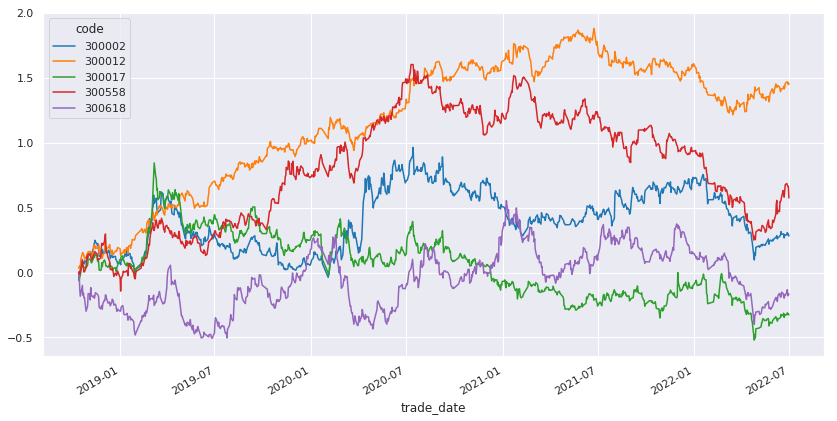

In [6]:
plt.figure(figsize=(14, 7))
data.cumsum().plot()
plt.show()

##### 皮尔逊相关系数

In [7]:
corr_matrix(df=data.fillna(0), similar_type=ECoreCorrType.E_CORE_TYPE_PEARS)

code,300002,300012,300017,300558,300618
code,,,,,
300002,1.000000,0.214311,0.520798,0.272400,0.250476
300012,0.214311,1.000000,0.222515,0.341223,0.192575
300017,0.520798,0.222515,1.000000,0.250411,0.261128
300558,0.272400,0.341223,0.250411,1.000000,0.193580
300618,0.250476,0.192575,0.261128,0.193580,1.000000


##### 斯皮尔曼相关系数

In [8]:
corr_matrix(df=data, similar_type=ECoreCorrType.E_CORE_TYPE_ROLLING)

rolling_corr cost 0.542s


code,300002,300012,300017,300558,300618
code,,,,,
300002,1.000000,0.194075,0.546156,0.238410,0.222738
300012,0.194075,1.000000,0.168383,0.275820,0.164373
300017,0.546156,0.168383,1.000000,0.211354,0.248825
300558,0.238410,0.275820,0.211354,1.000000,0.154716
300618,0.222738,0.164373,0.248825,0.154716,1.000000


##### 基于＋－符号相关系数

In [9]:
corr_matrix(df=data, similar_type=ECoreCorrType.E_CORE_TYPE_SIGN)

code,300002,300012,300017,300558,300618
code,,,,,
300002,1.000000,0.125795,0.505843,0.211626,0.205285
300012,0.125795,1.000000,0.146871,0.229799,0.140418
300017,0.505843,0.146871,1.000000,0.206285,0.193492
300558,0.211626,0.229799,0.206285,1.000000,0.120109
300618,0.205285,0.140418,0.193492,0.120109,1.000000


##### 移动时间加权相关系数

In [10]:
corr_matrix(df=data, similar_type=ECoreCorrType.E_CORE_TYPE_ROLLING)

rolling_corr cost 0.531s


code,300002,300012,300017,300558,300618
code,,,,,
300002,1.000000,0.194075,0.546156,0.238410,0.222738
300012,0.194075,1.000000,0.168383,0.275820,0.164373
300017,0.546156,0.168383,1.000000,0.211354,0.248825
300558,0.238410,0.275820,0.211354,1.000000,0.154716
300618,0.222738,0.164373,0.248825,0.154716,1.000000
